In [1]:
# IMPORTING LIBRARIES

import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
#from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import time
from statistics import variance
import statistics
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf




In [2]:
#LOADING  DATASET

mat = scipy.io.loadmat('Hourly Data2012.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("example.csv")
data=pd.read_csv("example.csv")

In [3]:
data

,Unnamed: 0,C,R,dataH,dataHarray,dataHourly,dataL,i
0,0,28.0,366.0,31536.170213,31536.170213,2012.000000,2012.0,28.0
1,1,NaN,NaN,32347.872340,32347.872340,1.000000,1.0,NaN
2,2,NaN,NaN,31190.425532,31190.425532,1.000000,1.0,NaN
3,3,NaN,NaN,29007.446809,29007.446809,100.000000,94.0,NaN
4,4,NaN,NaN,26782.978723,26782.978723,31536.170213,29644.0,NaN
...,...,...,...,...,...,...,...,...
8779,8779,NaN,NaN,NaN,45827.956989,NaN,NaN,NaN
8780,8780,NaN,NaN,NaN,42244.086022,NaN,NaN,NaN
8781,8781,NaN,NaN,NaN,38386.021505,NaN,NaN,NaN
8782,8782,NaN,NaN,NaN,35521.505376,NaN,NaN,NaN


In [4]:
data.shape

(8784, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   C           1 non-null      float64
 2   R           1 non-null      float64
 3   dataH       24 non-null     float64
 4   dataHarray  8783 non-null   float64
 5   dataHourly  28 non-null     float64
 6   dataL       28 non-null     float64
 7   i           1 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 549.1 KB


In [6]:
data.isnull().sum()

Unnamed: 0       0
C             8783
R             8783
dataH         8760
dataHarray       1
dataHourly    8756
dataL         8756
i             8783
dtype: int64

In [7]:
data_Harray = data[["dataHarray"]]
data_Harray

,dataHarray
0,31536.170213
1,32347.872340
2,31190.425532
3,29007.446809
4,26782.978723
...,...
8779,45827.956989
8780,42244.086022
8781,38386.021505
8782,35521.505376


In [8]:
data_Harray.isnull().sum()

dataHarray    1
dtype: int64

In [9]:
# One null value

In [10]:
data_Harray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dataHarray  8783 non-null   float64
dtypes: float64(1)
memory usage: 68.8 KB


In [11]:
data_Harray['dataHarray'] = data_Harray['dataHarray'].fillna(data_Harray['dataHarray'].mode()[0])

In [12]:
data_Harray.isnull().sum()

dataHarray    0
dtype: int64

In [13]:
#No null values

In [14]:
data_Harray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dataHarray  8784 non-null   float64
dtypes: float64(1)
memory usage: 68.8 KB


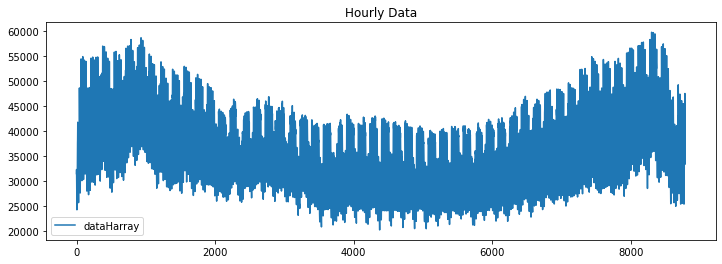

In [15]:
import matplotlib.pyplot as plt
data_Harray.plot(figsize=(12, 4))
plt.legend(loc='lower left')
plt.title('Hourly Data')
plt.show()


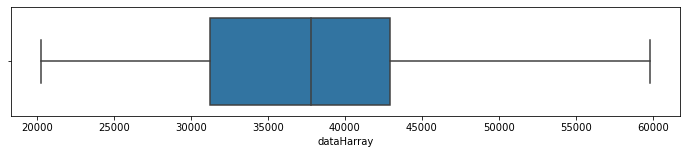

In [16]:
import seaborn as sns

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data_Harray['dataHarray'],whis=1.5)

In [17]:
#There are no outliers in the data

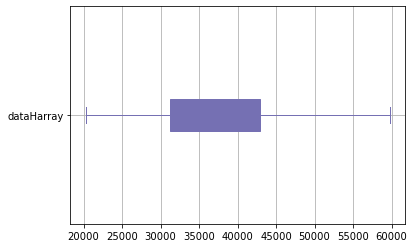

In [18]:
data_Harray.boxplot(patch_artist=True, whis = 1.5, color = '#7570b3', vert = False)
plt.show()

In [19]:
#There are no outliers in the data

In [20]:
data=data_Harray[:1344]

In [21]:
window = 30;
horizon = 10;

In [22]:
X_input = data_Harray[:1320]                
X_output = data_Harray[24:1344]

In [23]:
X_input

,dataHarray
0,31536.170213
1,32347.872340
2,31190.425532
3,29007.446809
4,26782.978723
...,...
1315,49598.936170
1316,47397.872340
1317,44200.000000
1318,40751.063830


In [24]:
X_output

,dataHarray
24,30367.021277
25,30376.595745
26,29423.404255
27,28292.553191
28,26921.276596
...,...
1339,46037.234043
1340,44057.446809
1341,41396.808511
1342,38536.170213


In [25]:
# Training set
X_input_train = data_Harray[:window*24]
X_output_train = data_Harray[24:(window+1)*24]

In [26]:
X_input_train

,dataHarray
0,31536.170213
1,32347.872340
2,31190.425532
3,29007.446809
4,26782.978723
...,...
715,56063.829787
716,54125.531915
717,50762.765957
718,46577.659574


In [27]:
X_output

,dataHarray
24,30367.021277
25,30376.595745
26,29423.404255
27,28292.553191
28,26921.276596
...,...
1339,46037.234043
1340,44057.446809
1341,41396.808511
1342,38536.170213


In [28]:
# Testing set
X_input_test = data_Harray[(window*24):(window+horizon)*24]
X_output_test = data_Harray[((window*24)+24):(window+horizon+1)*24]

In [29]:
X_input_test

,dataHarray
720,37079.787234
721,36662.765957
722,36154.255319
723,35496.808511
724,34702.127660
...,...
955,58174.468085
956,56302.127660
957,53180.851064
958,48982.978723


In [30]:
X_output_test

,dataHarray
744,37953.191489
745,37456.382979
746,36801.063830
747,36152.127660
748,35455.319149
...,...
979,56773.404255
980,53955.319149
981,50531.914894
982,46932.978723


In [31]:
#data Transformation
logdata=np.log(data)

In [32]:
logdata

,dataHarray
0,10.358890
1,10.384304
2,10.347866
3,10.275308
4,10.195522
...,...
1339,10.737206
1340,10.693250
1341,10.630959
1342,10.559353


In [33]:
#Checking stationarity in the data
result = adfuller(data_Harray['dataHarray'])

In [34]:
print(result)

(-7.004611628394724, 7.175444415285273e-10, 37, 8746, {'1%': -3.43109790993778, '5%': -2.861870526484161, '10%': -2.566945934275714}, 138209.1681342923)


In [35]:
diff_stationary = data_Harray.diff()

In [36]:
diff_stationary

,dataHarray
0,NaN
1,811.702128
2,-1157.446809
3,-2182.978723
4,-2224.468085
...,...
8779,-1725.806452
8780,-3583.870968
8781,-3858.064516
8782,-2864.516129


In [37]:
linearlogdata = signal.detrend(logdata)


df = pd.Series( (v[0] for v in linearlogdata) )

#Perform Differences

difflinearlogdata =df.diff()

difflinearlogdata


0                NaN
1       0.000000e+00
2      -1.776357e-15
3       1.776357e-15
4       0.000000e+00
            ...     
1339    1.776357e-15
1340    1.776357e-15
1341   -3.552714e-15
1342    1.776357e-15
1343    0.000000e+00
Length: 1344, dtype: float64

In [38]:
# adfuller[difflinearlogdata]

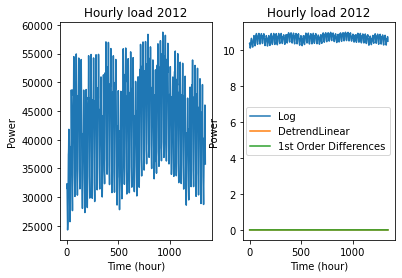

In [39]:
# View Data
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(data)
ax1.set_title('Hourly load 2012')
ax1.set_xlabel('Time (hour)')
ax1.set_ylabel('Power')

ax2.plot(logdata, label="Log")
ax2.set_title('Hourly load 2012')
ax2.set_xlabel('Time (hour)')
ax2.set_ylabel('Power')


ax2.plot(linearlogdata, label = "DetrendLinear")
ax2.plot(difflinearlogdata, label = "1st Order Differences")
ax2.legend(loc='best')


In [40]:
diff_data = data.diff()
diff_data.isnull().sum()


dataHarray    1
dtype: int64

In [41]:
adfuller(diff_data[1:])

(-6.093041271921281,
 1.0255342054717401e-07,
 23,
 1319,
 {'1%': -3.4353174541055567,
  '5%': -2.863733732389869,
  '10%': -2.5679379527245407},
 21531.510239579206)

In [42]:
#DOUBT ABOVE

In [43]:
# from statsmodels.tsa.stattools import adfuller
# from numpy import log
# def adf_test(timeseries):
#     result = adfuller(datadiff.dropna())
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     for key, value in new_df['dataHarray'].items():
#         output('critical value (%s)'%key) = value 
#         print(output)
# adf_test(df['dataHarray'])

In [44]:
# from statsmodels.tsa.stattools import adfuller
# data=data['dataHarray']
# X = data.values
# result = adfuller(X)
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))

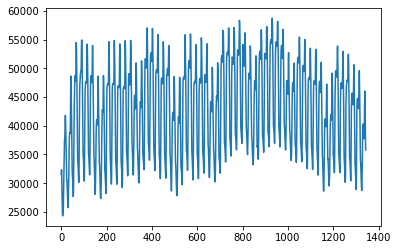

In [45]:
plt.plot(data)
plt.show()

In [46]:
# import datetime
# x = pd.read_csv('example.csv', header=0, parse_dates=['Date'], index_col=0)
# x.index = pd.DatetimeIndex(x.index).to_period('D')
# x = x.sort_index()
data

,dataHarray
0,31536.170213
1,32347.872340
2,31190.425532
3,29007.446809
4,26782.978723
...,...
1339,46037.234043
1340,44057.446809
1341,41396.808511
1342,38536.170213


In [47]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
stationary_series = []
for items in data:
    stationary_series.append(data_Harray)

In [48]:
# import statsmodels
# from statsmodels.tsa.stattools import adfuller
# non_stationary_series = []
# for items in data:
#     non_stationary_series.append(data)
data_Harray

,dataHarray
0,31536.170213
1,32347.872340
2,31190.425532
3,29007.446809
4,26782.978723
...,...
8779,45827.956989
8780,42244.086022
8781,38386.021505
8782,35521.505376


In [49]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)


In [50]:
# sTest = StationarityTests()
# sTest.ADF_Stationarity_Test(stationary_series, printResults = True)
# print("Is the test valid? {0}".format(sTest.isStationary))

In [51]:
# # import ADF_Stationarity_Test from StationarityTests
# sTest = StationarityTests()
# sTest.ADF_Stationarity_Test(stationary_series, printResults = True)
# print("Is the time series stationary? {0}".format(sTest.isStationary))

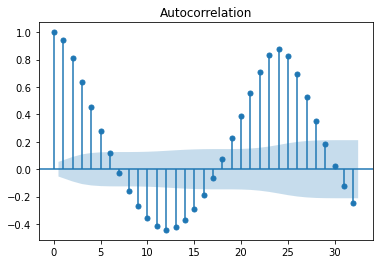

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
# AUTO CORRELATION 
data = data[['dataHarray']]
# Calculate the ACF (via statsmodel)
plot_acf(data)
plt.show()

Observation:
AR Model of order(1) is appropriate

#The ACF shows a gradually decreasing trend or increasing trend in AR & MA model

In [53]:
# Taking sample values from data for Calculating MA model and for predicting future data
train = data_Harray.iloc[:30]
test = data_Harray.iloc[30:]

In [54]:
#Train the model

dataHarray_model = ARIMA(train['dataHarray'], order = (1, 2))
dataHarray_model = dataHarray_model.fit()
dataHarray_model.summary()

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
# PARTIAL AUTOCORRELATION 
data = data[['dataHarray']]
# Calculate the ACF (via statsmodel)
plot_pacf(data)
plt.show()

Observation:
AR Model of order(1) is appropriate

#The PACF cuts immediately after one lag.